#                                            # SALES ANALYSIS
                                            
                                            
                                            
                                            
                                            
                                            

# OBJECTIVE

1. What is the overall sales trend?
2. What are the top 10 product by sales?
3. What are the most selling product?
4. Which is the most prefered ship mde?
5. Which are the most profitable category and sub-category?

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
#Reading the data

df = pd.read_excel("Downloads/superstore_sales.xlsx")

# DATA AUDIT

In [11]:
#SHOWING FIRST 5 OF ROWS
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [12]:
#Showing last five of rows
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [13]:
#showing number of rows and columns
df.shape

(51290, 21)

In [14]:
#Columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [15]:
#Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [16]:
#Checkin for missing values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [17]:
#Getting descriptive statistics summary
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [18]:
#Generating full summary of the dataset

import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h4>WHAT IS THE OVERALL SALES TREND?

In [19]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [20]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [21]:
#Getting month year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%y-%m'))

In [22]:
df['month_year']

0        11-01
1        11-01
2        11-01
3        11-01
4        11-01
         ...  
51285    14-12
51286    14-12
51287    14-12
51288    14-12
51289    14-12
Name: month_year, Length: 51290, dtype: object

In [23]:
df.groupby('month_year').sum()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
11-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763
11-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158
11-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929
11-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204
11-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226
11-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087
11-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445
11-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658
11-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572


In [24]:
#grouping month_year
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

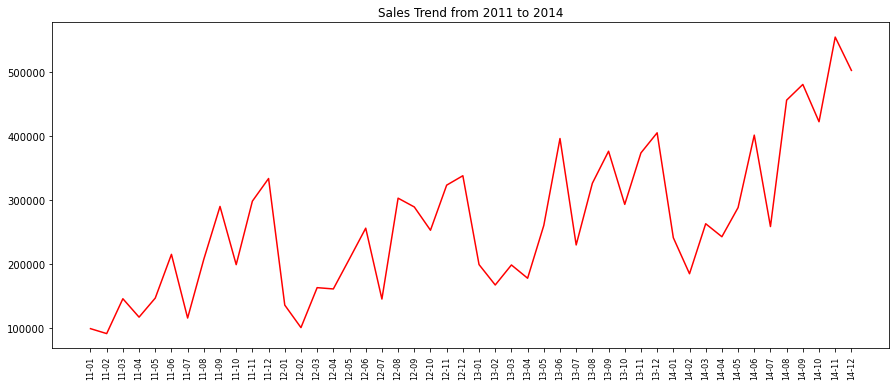

In [27]:
plt.figure(figsize = (15,6))
plt.plot(df_trend['month_year'], df_trend['sales'], color = 'red')
plt.xticks(rotation = 'vertical', size = 8)
plt.title('Sales Trend from 2011 to 2014')

plt.show

<h4>WHICH ARE THE TOP 10 PRODUCT BY SALES

In [32]:
#Grouping Product name column
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [33]:
#Sorting in ascending order
prod_sales = prod_sales.sort_values('sales', ascending = False)

In [36]:
prod_sales.head(10)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


<h4>WHICH ARE THE MOST SELLING PRODUCT?

In [42]:
#Grouping product name
most_sell_prod= pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [43]:
most_sell_prod = most_sell_prod.sort_values('quantity', ascending = False)

In [44]:
most_sell_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


<h4>WHAT IS THE MOST PREFERRED SHIP MODE 

C:\Users\Mr.Henry Otoo-Mensah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


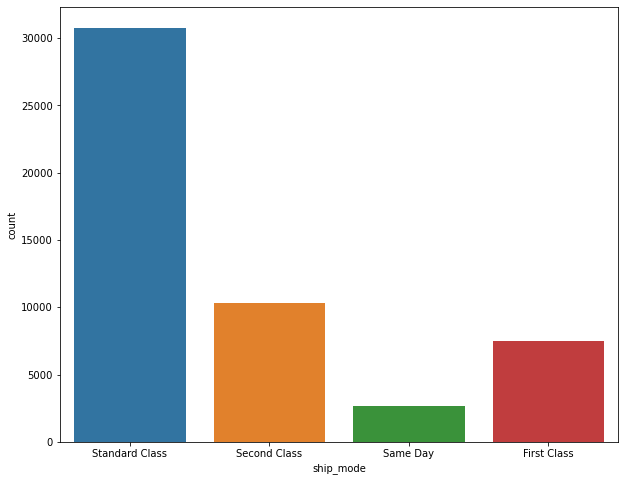

In [47]:
#Plotting ship mode

plt.figure(figsize=(10, 8))
sns.countplot(df['ship_mode'])

plt.show()

<h4>WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB_CATEGORY?

In [104]:
#Grouping category and sub_category

cat_subcat_profit = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [55]:
#Sorting the result
cat_subcat_profit = cat_subcat_profit.sort_values(['category','profit'], ascending = False)

In [56]:
cat_subcat_profit[:]

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

<h4>WHich REGION HAS THE HIGHEST PROFIT?

In [80]:
region_profit = pd.DataFrame(df.groupby(['region']).sum()['profit'])

In [81]:
region_profit = region_profit.sort_values('profit', ascending = False)

In [82]:
region_profit[:]

,profit
region,
Central,311403.98164
North,194597.95252
North Asia,165578.42100
South,140355.76618
Central Asia,132480.18700
Oceania,121666.64200
West,108418.44890
East,91522.78000
Africa,88871.63100


<h4>SHOWING CORRELATION

In [85]:
#Plotting a heatmap

def df_to_plotly(df):
    return{'z':
df.values.tolist(),
           'x':
df.columns.tolist(),
           'y': df.index.tolist()
}

import plotly.graph_objects as go

dfNew = df.corr()
fig = go.Figure(data = go.Heatmap(df_to_plotly(dfNew)))

fig.show()


C:\Users\Mr.Henry Otoo-Mensah\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



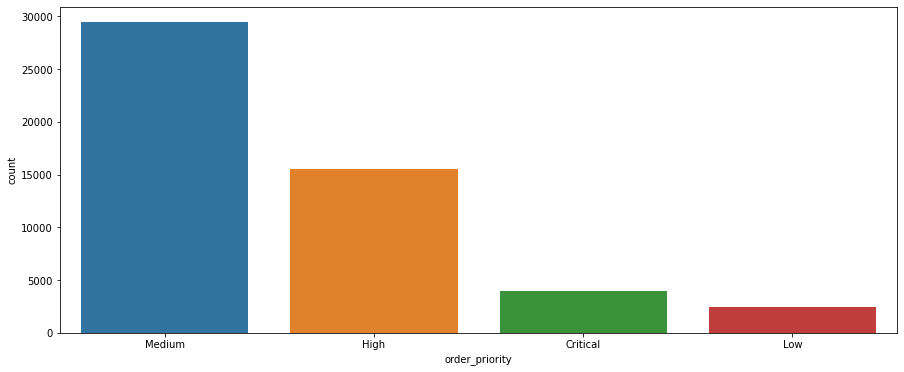

In [90]:
#Plotting on seaborn
plt.figure(figsize=(15,6))
sns.countplot(df['order_priority'])

plt.show()